In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
RelationshipFact = pd.read_csv(r'RelationshipFact.csv',nrows = 100000)
RelationshipFact.columns = 'relationshipId,person1_id,person1_professionId,person2_id,person2_professionId,movieCount,averageRating,averageNumVotes'.split(',')
profession = pd.read_csv(r'profession.csv')
Person = pd.read_csv(r'Person.csv')
PersonProfession = pd.read_csv(r'PersonProfession.csv')

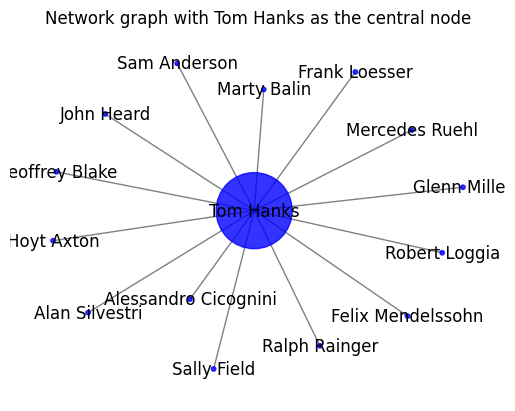

In [43]:
def data_for_viz(Name,prof1, prof2):
    
    secondary_profession_id = profession[profession['profession'] == prof1]['professionId'].iloc[0]
    primary_profession_id = profession[profession['profession'] == prof2]['professionId'].iloc[0]
    primary_person_name = Name

    # Query to find the primary person ID
    query_result = Person.merge(PersonProfession, on='personId') \
                        .query("primaryName == @primary_person_name and professionId == @primary_profession_id")

    # Check if the query result is empty
    if not query_result.empty:
        primary_person_id = query_result['personId'].iloc[0]
    else:
        primary_person_id = None
        print("No matching person found")

    # Proceed only if primary_person_id is found
    if primary_person_id is not None:
        # Continue with your subsequent operations...
        collaborations = RelationshipFact.merge(PersonProfession, left_on='person2_id', right_on='personId') \
                                            .query("person1_id == @primary_person_id and professionId == @secondary_profession_id") \
                                            [['person2_id', 'movieCount', 'averageRating', 'averageNumVotes']]
            # Mapping person2_id to names
        collaborations = collaborations.merge(Person, left_on='person2_id', right_on='personId', how='left') \
                                    .rename(columns={'primaryName': 'person2_name'}) \
                                    [['person2_name', 'movieCount', 'averageRating', 'averageNumVotes']]

    return aggregated_collaborations = collaborations.groupby('person2_name').agg({
        'movieCount': 'mean',
        'averageRating': 'mean',
        'averageNumVotes': 'mean'
        }).reset_index()


def create_network_graph(Name,data,interest):
    # Create a graph
    G = nx.Graph()
    # Add the central node
    G.add_node(Name, size=300)
    # Add other nodes and connect them to the central node
    
    for position, count in zip(list(data['person2_name']),list(data[interest])):
        G.add_node(position, size=count)
        G.add_edge(central_node_name, position)

    # Generate positions for each node for plotting
    pos = nx.spring_layout(G)

    # Draw the nodes
    sizes = [G.nodes[node]['size']*10 for node in G.nodes]  # Multiply by 10 for better visibility
    nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='blue', alpha=0.8)
    
    # Draw the edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    
    # Draw the labels
    nx.draw_networkx_labels(G, pos)

    # Set the plot title
    plt.title(f'Network graph with {central_node_name} as the central node')
    
    # Remove the axes
    plt.axis('off')
    
    # Show the plot
    plt.show()

data = data_for_viz('Tom Hanks', 'stunts','stunts')
create_network_graph('Tom Hanks',data,interest = 'movieCount')
